In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
customers = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv') # null value exist 
orders= pd.read_csv('olist_orders_dataset.csv') # null value exist 
products = pd.read_csv('olist_products_dataset.csv') # null value exist 
sellers = pd.read_csv('olist_sellers_dataset.csv')
product_category_name_translation = pd.read_csv('product_category_name_translation.csv')

In [31]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [32]:
df1=pd.DataFrame(orders )  # = bydefo
df2=pd.DataFrame(order_payments)
df3 =pd.DataFrame(order_items)
df4 = pd.DataFrame(order_reviews)
df5 = pd.DataFrame(customers)
df6 = pd.DataFrame(products)
df7 = pd.DataFrame(geolocation)
df8 = pd.DataFrame(sellers)

In [33]:
df9 =pd.merge(df1,df2,on = 'order_id')
df10 =pd.merge(df3,df4,on = 'order_id')
df11 =pd.merge(df9,df10,on = 'order_id')
df12 =pd.merge(df1,df5,on = 'customer_id')
df13 =pd.merge(df11,df12,on = 'customer_id')
df14=pd.merge(df13,df6,on = 'product_id')
df15=pd.merge(df14,df8,on = 'seller_id')

In [34]:
df15.head(5)

,order_id_x,customer_id,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,payment_sequential,payment_type,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP


In [35]:
df15['price'].unique().sum()

1688280.06

In [36]:
df15['product_category_name'].nunique()

73

In [37]:
df15.isnull().sum()

order_id_x                              0
customer_id                             0
order_status_x                          0
order_purchase_timestamp_x              0
order_approved_at_x                    15
order_delivered_carrier_date_x       1254
order_delivered_customer_date_x      2588
order_estimated_delivery_date_x         0
payment_sequential                      0
payment_type                            0
payment_installments                    0
payment_value                           0
order_item_id                           0
product_id                              0
seller_id                               0
shipping_limit_date                     0
price                                   0
freight_value                           0
review_id                               0
review_score                            0
review_comment_title               104226
review_comment_message              67650
review_creation_date                    0
review_answer_timestamp           

In [38]:
df15= df15.dropna()

In [39]:
df15.isnull().sum()

order_id_x                         0
customer_id                        0
order_status_x                     0
order_purchase_timestamp_x         0
order_approved_at_x                0
order_delivered_carrier_date_x     0
order_delivered_customer_date_x    0
order_estimated_delivery_date_x    0
payment_sequential                 0
payment_type                       0
payment_installments               0
payment_value                      0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
review_id                          0
review_score                       0
review_comment_title               0
review_comment_message             0
review_creation_date               0
review_answer_timestamp            0
order_id_y                         0
order_status_y                     0
order_purchase_timestamp_y         0
o

In [40]:
df15.duplicated().sum()

0

In [41]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11751 entries, 58 to 118300
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   order_id_x                       11751 non-null  object 
 1   customer_id                      11751 non-null  object 
 2   order_status_x                   11751 non-null  object 
 3   order_purchase_timestamp_x       11751 non-null  object 
 4   order_approved_at_x              11751 non-null  object 
 5   order_delivered_carrier_date_x   11751 non-null  object 
 6   order_delivered_customer_date_x  11751 non-null  object 
 7   order_estimated_delivery_date_x  11751 non-null  object 
 8   payment_sequential               11751 non-null  int64  
 9   payment_type                     11751 non-null  object 
 10  payment_installments             11751 non-null  int64  
 11  payment_value                    11751 non-null  float64
 12  order_item_id   

In [42]:
df15.describe()

,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,review_score,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
count,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.00000,11751.000000,11751.000000,11751.000000
mean,1.057272,3.059654,198.151126,1.252404,130.965543,21.993697,3.769126,33865.726321,49.292571,814.670581,2.203472,2116.237852,28.96528,16.569483,22.459365,23412.347375
std,0.378402,2.838207,308.630532,0.778726,219.259830,18.772834,1.576223,28979.700727,9.747913,644.853363,1.695865,3753.872665,15.27857,13.184372,10.995838,26974.623340
min,1.000000,1.000000,0.050000,1.000000,0.850000,0.000000,1.000000,1003.000000,8.000000,4.000000,1.000000,0.000000,11.00000,2.000000,7.000000,1001.000000
25%,1.000000,1.000000,67.440000,1.000000,40.000000,12.915000,3.000000,11020.000000,43.000000,366.000000,1.000000,292.000000,18.00000,8.000000,15.000000,5849.000000
50%,1.000000,2.000000,122.690000,1.000000,78.900000,18.230000,5.000000,23560.000000,52.000000,634.000000,1.000000,650.000000,23.00000,13.000000,20.000000,13405.000000
75%,1.000000,4.000000,209.780000,1.000000,139.000000,23.345000,5.000000,55305.000000,57.000000,1031.000000,3.000000,1764.500000,35.00000,20.000000,29.000000,24451.000000
max,12.000000,20.000000,7274.880000,13.000000,6729.000000,375.280000,5.000000,99980.000000,64.000000,3985.000000,17.000000,30000.000000,105.00000,105.000000,105.000000,99730.000000


In [43]:
df15.corr()

,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,review_score,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
payment_sequential,1.000000,-0.096848,-0.062735,-0.029421,0.030863,0.032303,0.006332,0.023469,0.034334,-0.002134,0.020698,0.039394,0.042975,0.031179,0.069418,-0.012187
payment_installments,-0.096848,1.000000,0.299445,0.071894,0.285931,0.206856,-0.044747,0.074722,-0.006589,0.028758,0.003083,0.182883,0.116998,0.131362,0.123447,0.065634
payment_value,-0.062735,0.299445,1.000000,0.229237,0.759545,0.385819,-0.105944,0.093075,-0.002371,0.171892,0.019198,0.328983,0.190341,0.222107,0.167578,0.081759
order_item_id,-0.029421,0.071894,0.229237,1.000000,-0.070363,-0.050809,-0.157964,0.017115,-0.014169,-0.026038,-0.063703,0.021670,0.007425,0.072100,0.008871,-0.035254
price,0.030863,0.285931,0.759545,-0.070363,1.000000,0.424536,-0.017856,0.069972,0.016799,0.191279,0.063529,0.319663,0.181378,0.192859,0.168746,0.099320
freight_value,0.032303,0.206856,0.385819,-0.050809,0.424536,1.000000,-0.030374,0.265075,0.040768,0.131111,0.029657,0.593197,0.380547,0.364430,0.352866,0.185396
review_score,0.006332,-0.044747,-0.105944,-0.157964,-0.017856,-0.030374,1.000000,-0.021658,-0.006587,0.000289,0.025217,-0.043278,-0.012500,-0.053284,-0.006107,0.009698
customer_zip_code_prefix,0.023469,0.074722,0.093075,0.017115,0.069972,0.265075,-0.021658,1.000000,0.025309,0.033894,0.019782,0.004400,0.010760,0.019358,-0.012805,0.094747
product_name_lenght,0.034334,-0.006589,-0.002371,-0.014169,0.016799,0.040768,-0.006587,0.025309,1.000000,0.111258,0.190307,0.019185,0.036288,-0.042619,0.031504,0.000800
product_description_lenght,-0.002134,0.028758,0.171892,-0.026038,0.191279,0.131111,0.000289,0.033894,0.111258,1.000000,0.147823,0.100909,0.078471,0.094141,-0.032030,0.058099


In [44]:
df15.shape

(11751, 46)

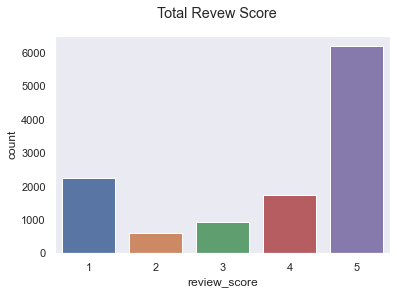

5    52.752957
1    19.130287
4    14.858310
3     8.067399
2     5.191048
Name: review_score, dtype: float64

In [45]:
sns.set_theme(style = 'dark')
sns.countplot(x ='review_score',data =df15 )
plt.suptitle('Total Revew Score')
plt.show()
df15['review_score'].value_counts()/df15['review_score'].count()*100

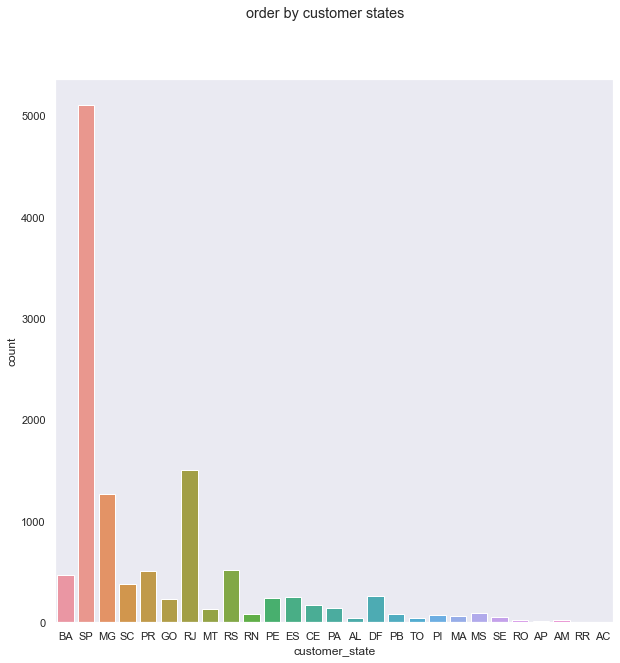

total_states 27
total_custmer_by_states 11751
    number_of_custmer  percentage
SP               5111   43.494171
RJ               1503   12.790401
MG               1266   10.773551
RS                520    4.425155
PR                510    4.340056
BA                464    3.948600
SC                377    3.208238
DF                258    2.195558
ES                248    2.110459
PE                235    1.999830
GO                228    1.940260
CE                168    1.429666
PA                146    1.242447
MT                135    1.148838
MS                 94    0.799932
PB                 79    0.672283
RN                 78    0.663773
PI                 68    0.578674
MA                 67    0.570164
SE                 50    0.425496
AL                 46    0.391456
TO                 38    0.323377
RO                 21    0.178708
AM                 20    0.170198
AP                 10    0.085099
RR                  7    0.059569
AC                  4    0.034040


In [46]:
plt.figure(figsize=(10,10))
sns.set_theme(style = 'dark')
sns.countplot(x ='customer_state',data =df15 )
plt.suptitle('order by customer states')
plt.show()
total_states = df15['customer_state'].nunique()
total_customer =df15['customer_state'].value_counts().sum()
print('total_states',total_states)
print('total_custmer_by_states',total_customer)
total = df15['customer_state'].unique()
number_of_custmer =df15['customer_state'].value_counts()
total_custmer =df15['customer_state'].value_counts().sum()
percent = (number_of_custmer/total_custmer)*100
customer_by_state =pd.DataFrame({"number_of_custmer":number_of_custmer,
                                   'percentage':percent })
print(customer_by_state)


    number_of_custmer  percentage
SP               5111   43.494171
RJ               1503   12.790401
MG               1266   10.773551
RS                520    4.425155
PR                510    4.340056
BA                464    3.948600
SC                377    3.208238
DF                258    2.195558
ES                248    2.110459
PE                235    1.999830
GO                228    1.940260
CE                168    1.429666
PA                146    1.242447
MT                135    1.148838
MS                 94    0.799932
PB                 79    0.672283
RN                 78    0.663773
PI                 68    0.578674
MA                 67    0.570164
SE                 50    0.425496
AL                 46    0.391456
TO                 38    0.323377
RO                 21    0.178708
AM                 20    0.170198
AP                 10    0.085099
RR                  7    0.059569
AC                  4    0.034040


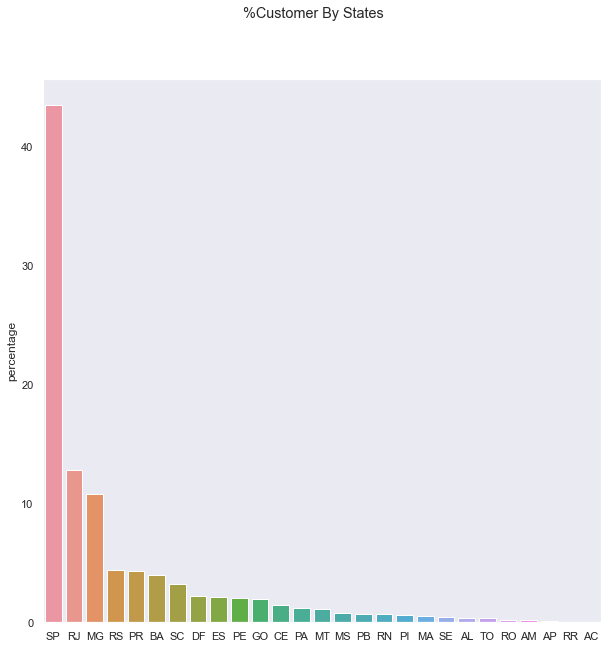

total_states 27
total_custmer_by_states 11751


In [47]:
total = df15['customer_state'].unique()
number_of_custmer =df15['customer_state'].value_counts()
total_custmer =df15['customer_state'].value_counts().sum()
percent = (number_of_custmer/total_custmer)*100
customer_by_state =pd.DataFrame({"number_of_custmer":number_of_custmer,
                                   'percentage':percent })
print(customer_by_state)

plt.figure(figsize=(10,10))
sns.set_theme(style = 'dark')
sns.barplot(x = customer_by_state.index,y =customer_by_state.percentage)
plt.suptitle('%Customer By States')
plt.show()
total_states = df15['customer_state'].nunique()
print('total_states',total_states)
print('total_custmer_by_states',total_custmer)

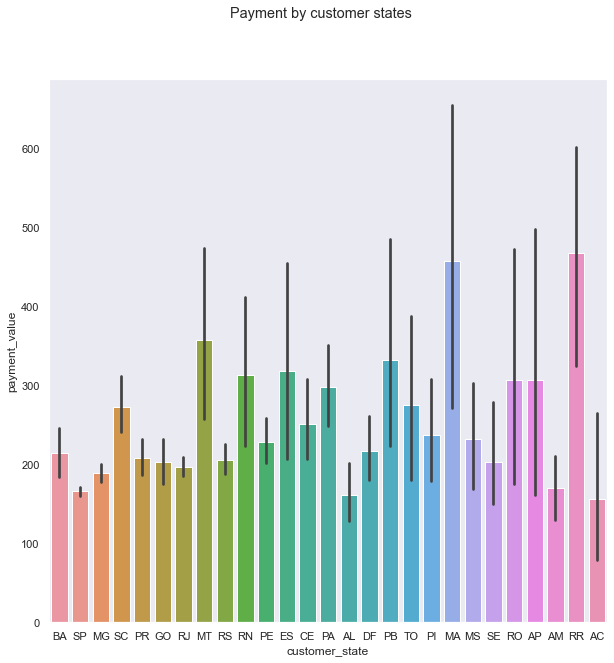

In [49]:
plt.figure(figsize=(10,10))
sns.set_theme(style = 'dark')
sns.barplot(x ='customer_state',y ='payment_value', data =df15 )
plt.suptitle(' Payment by customer states')
plt.show()
dr = df15.groupby('payment_value')['customer_state'].count()

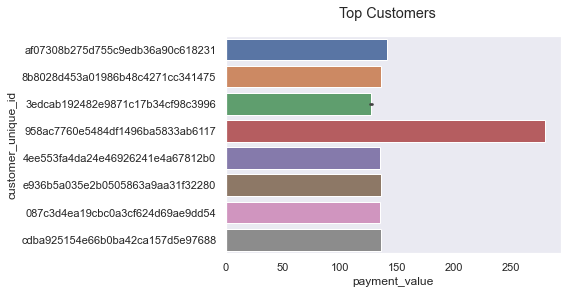

In [50]:
sns.set_theme(style = 'dark')
sns.barplot(x ='payment_value',y ='customer_unique_id',data =df15[:10] )
plt.suptitle('Top Customers')
plt.show()


In [51]:
number_of_order = df15['order_item_id'].value_counts()
total_number_of_order = number_of_order.sum()
percent =((number_of_order/total_number_of_order)*100)

In [52]:
df_items_per_order=pd.DataFrame({'Order in item':df15['order_item_id'].unique(),"Number of order":number_of_order,
                                   "percentage": percent })
print(df_items_per_order)

    Order in item  Number of order  percentage
1               1             9939   84.580036
2               2             1243   10.577823
3               3              296    2.518935
4               4              127    1.080759
5               5               71    0.604204
6               6               45    0.382946
7               7               10    0.085099
8               8                4    0.034040
9               9                4    0.034040
10             10                4    0.034040
11             11                4    0.034040
12             12                3    0.025530
13             13                1    0.008510


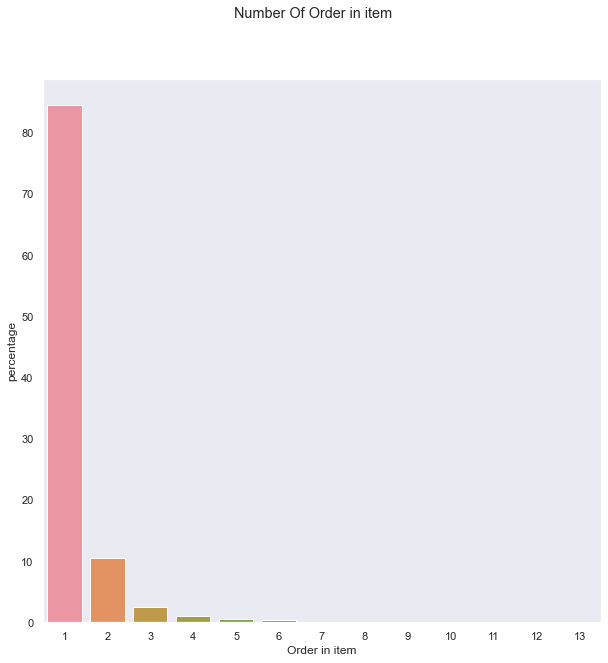

1     84.580036
2     10.577823
3      2.518935
4      1.080759
5      0.604204
6      0.382946
7      0.085099
8      0.034040
9      0.034040
10     0.034040
11     0.034040
12     0.025530
13     0.008510
Name: percentage, dtype: float64

In [53]:
plt.figure(figsize=(10,10))
sns.set_theme(style = 'dark')
sns.barplot(x = 'Order in item',y = 'percentage',data = df_items_per_order)
plt.suptitle('Number Of Order in item')
plt.show()
df_items_per_order['percentage']

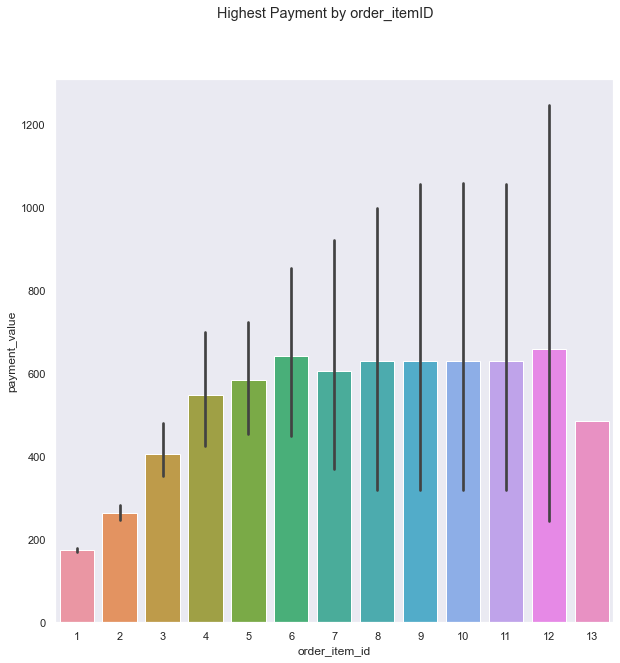

In [54]:
plt.figure(figsize=(10,10))
sns.set_theme(style = 'dark')
sns.barplot(x ='order_item_id',y ='payment_value', data =df15 )
plt.suptitle('Highest Payment by order_itemID')
plt.show()

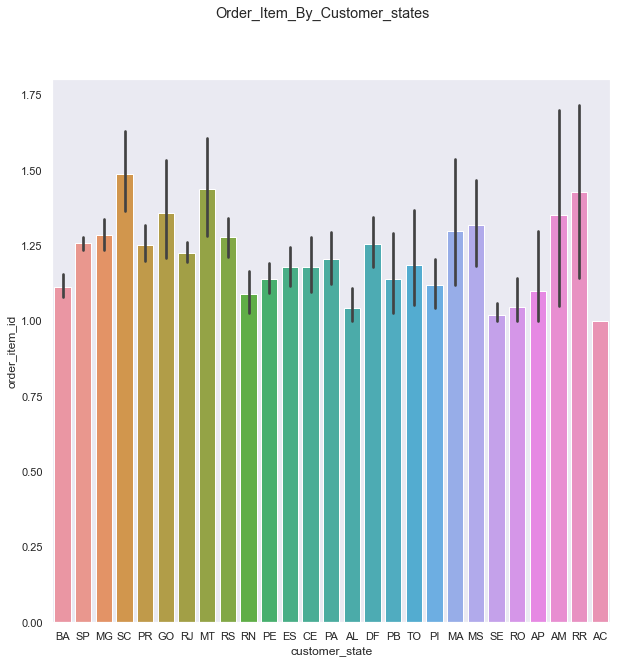

In [55]:
plt.figure(figsize=(10,10))
sns.set_theme(style = 'dark')
sns.barplot(x ='customer_state',y ='order_item_id', data =df15 )
plt.suptitle('Order_Item_By_Customer_states')
plt.show()

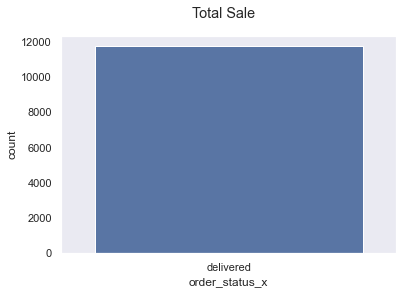

Total Sales 11751


In [56]:
sns.set_theme(style = 'dark')
sns.countplot(x ='order_status_x',data =df15 )
plt.suptitle('Total Sale')
plt.show()
total_sale = df15['order_status_x'].value_counts().sum()
print("Total Sales",total_sale)

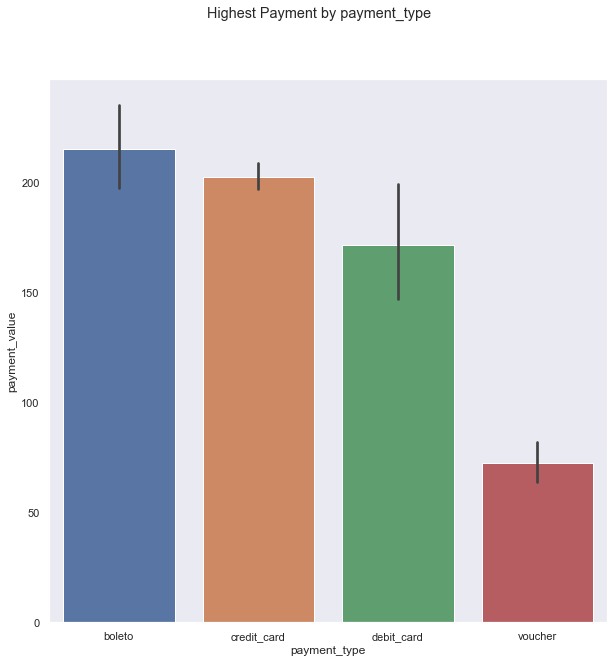

In [57]:
plt.figure(figsize=(10,10))
sns.set_theme(style = 'dark')
sns.barplot(x ='payment_type',y ='payment_value', data =df15 )
plt.suptitle('Highest Payment by payment_type')
plt.show()


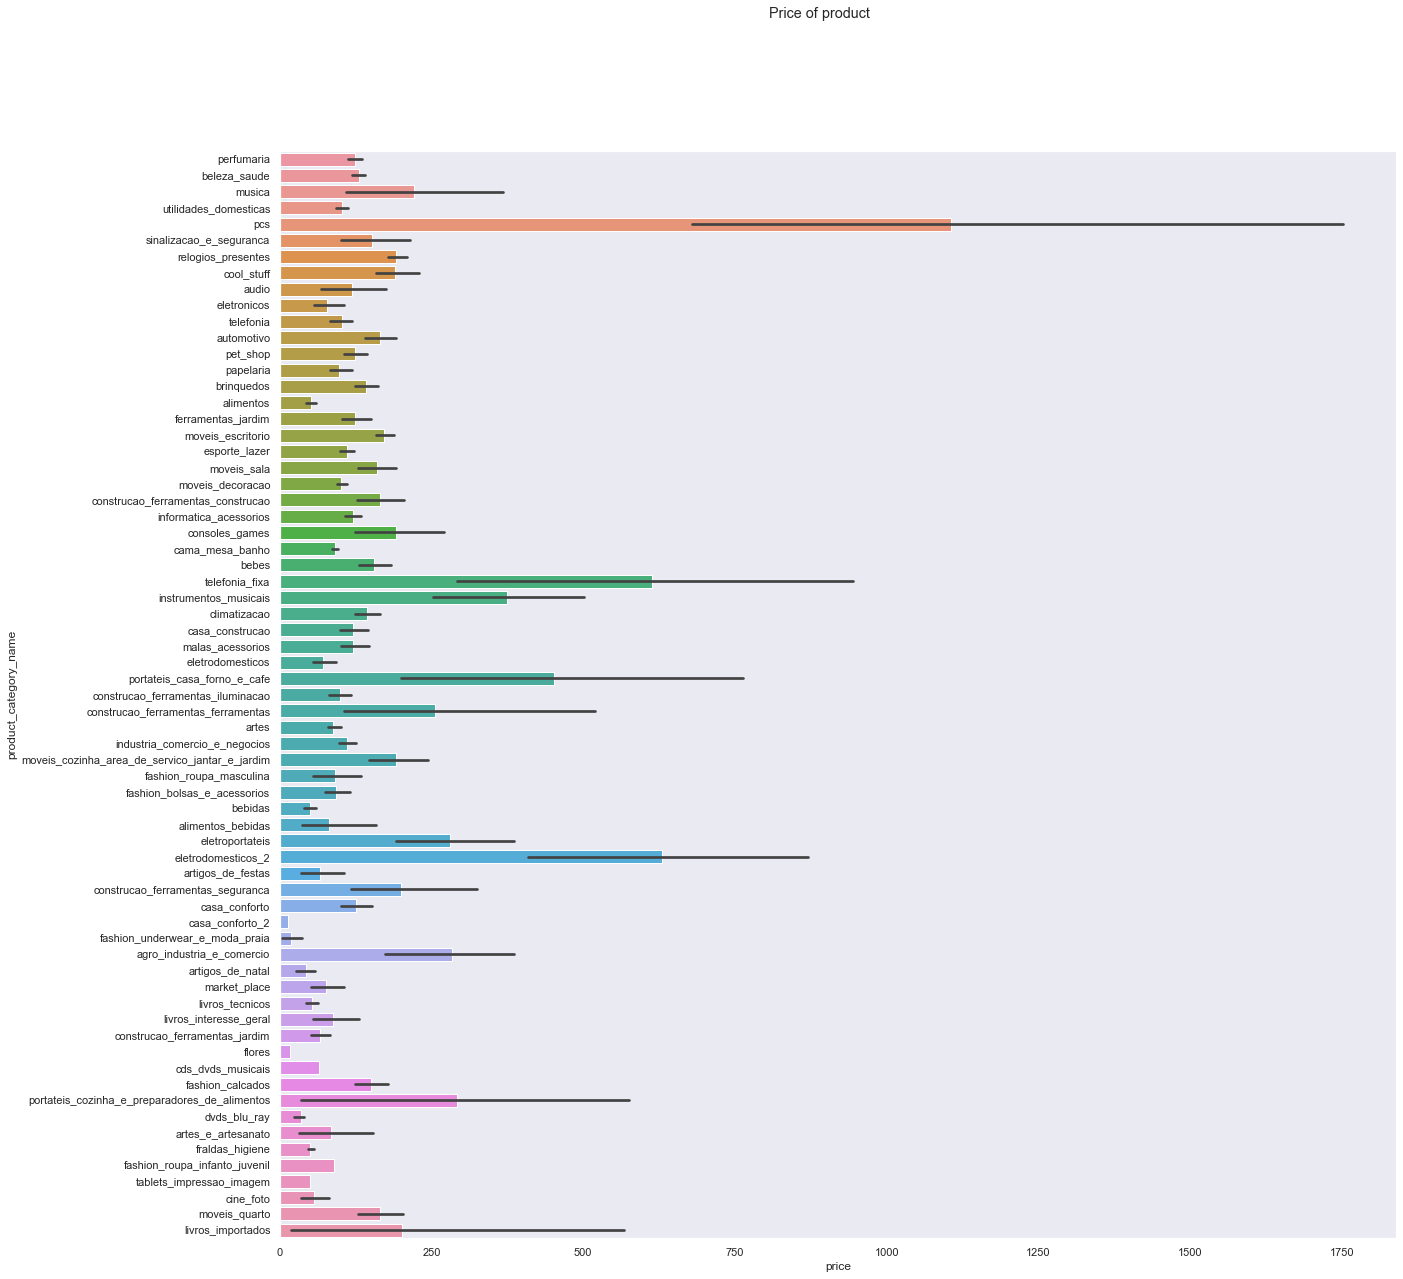

In [58]:
plt.figure(figsize=(20,20))
sns.set_theme(style = 'dark')
sns.barplot(x ='price',y ='product_category_name', data =df15 )
plt.suptitle('Price of product')
plt.show()

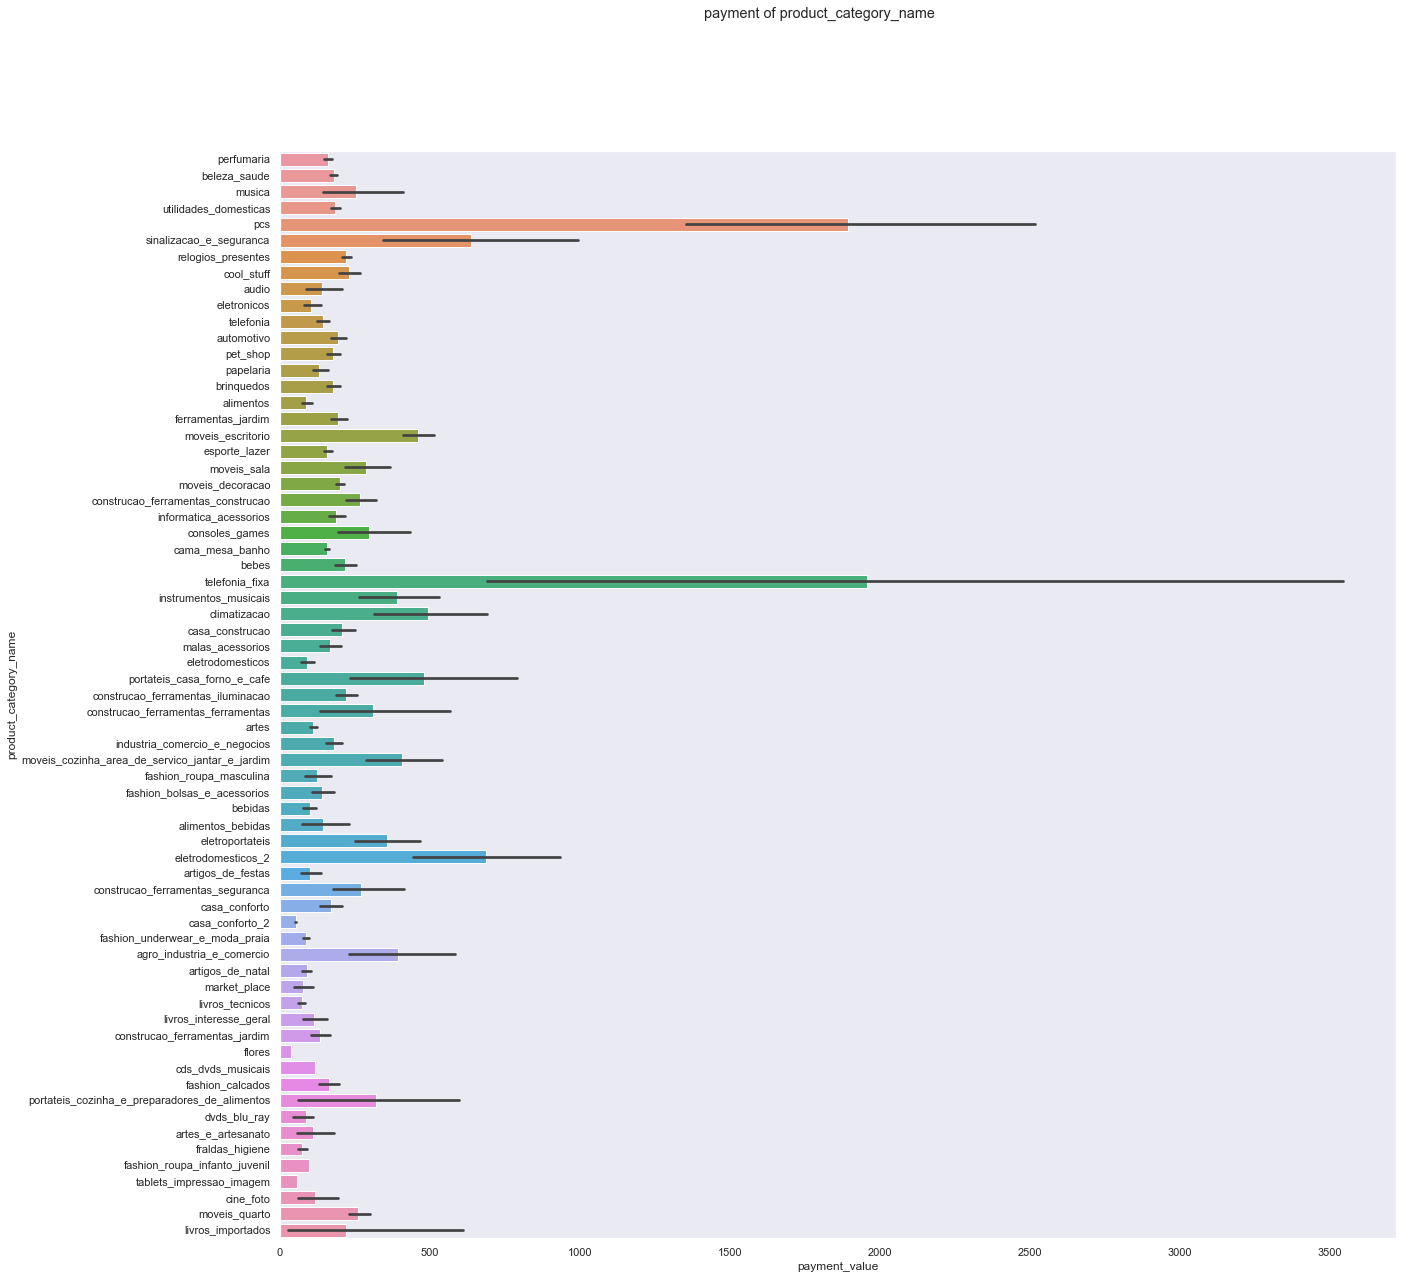

In [59]:
plt.figure(figsize=(20,20))
sns.set_theme(style = 'dark')
sns.barplot(x ='payment_value',y ='product_category_name', data =df15 )
plt.suptitle('payment of product_category_name')
plt.show()

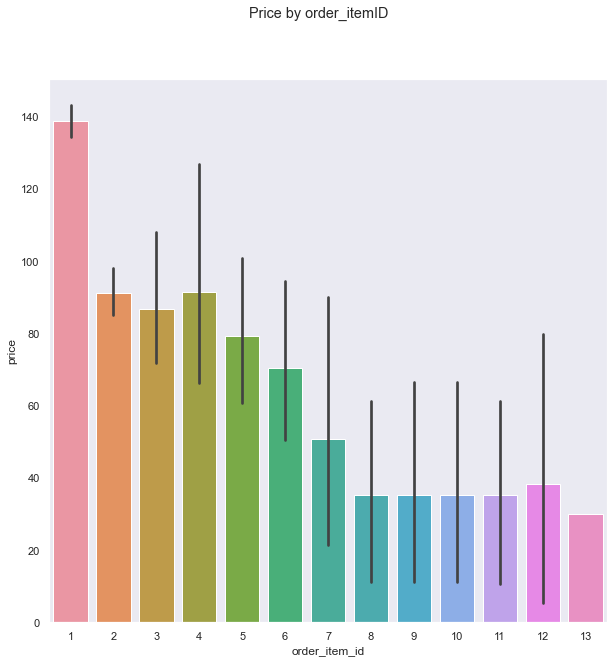

In [60]:
plt.figure(figsize=(10,10))
sns.set_theme(style = 'dark')
sns.barplot(x ='order_item_id',y ='price', data =df15 )
plt.suptitle('Price by order_itemID')
plt.show()

In [61]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11751 entries, 58 to 118300
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   order_id_x                       11751 non-null  object 
 1   customer_id                      11751 non-null  object 
 2   order_status_x                   11751 non-null  object 
 3   order_purchase_timestamp_x       11751 non-null  object 
 4   order_approved_at_x              11751 non-null  object 
 5   order_delivered_carrier_date_x   11751 non-null  object 
 6   order_delivered_customer_date_x  11751 non-null  object 
 7   order_estimated_delivery_date_x  11751 non-null  object 
 8   payment_sequential               11751 non-null  int64  
 9   payment_type                     11751 non-null  object 
 10  payment_installments             11751 non-null  int64  
 11  payment_value                    11751 non-null  float64
 12  order_item_id   

In [62]:
df16=df15[['product_category_name','order_item_id']]

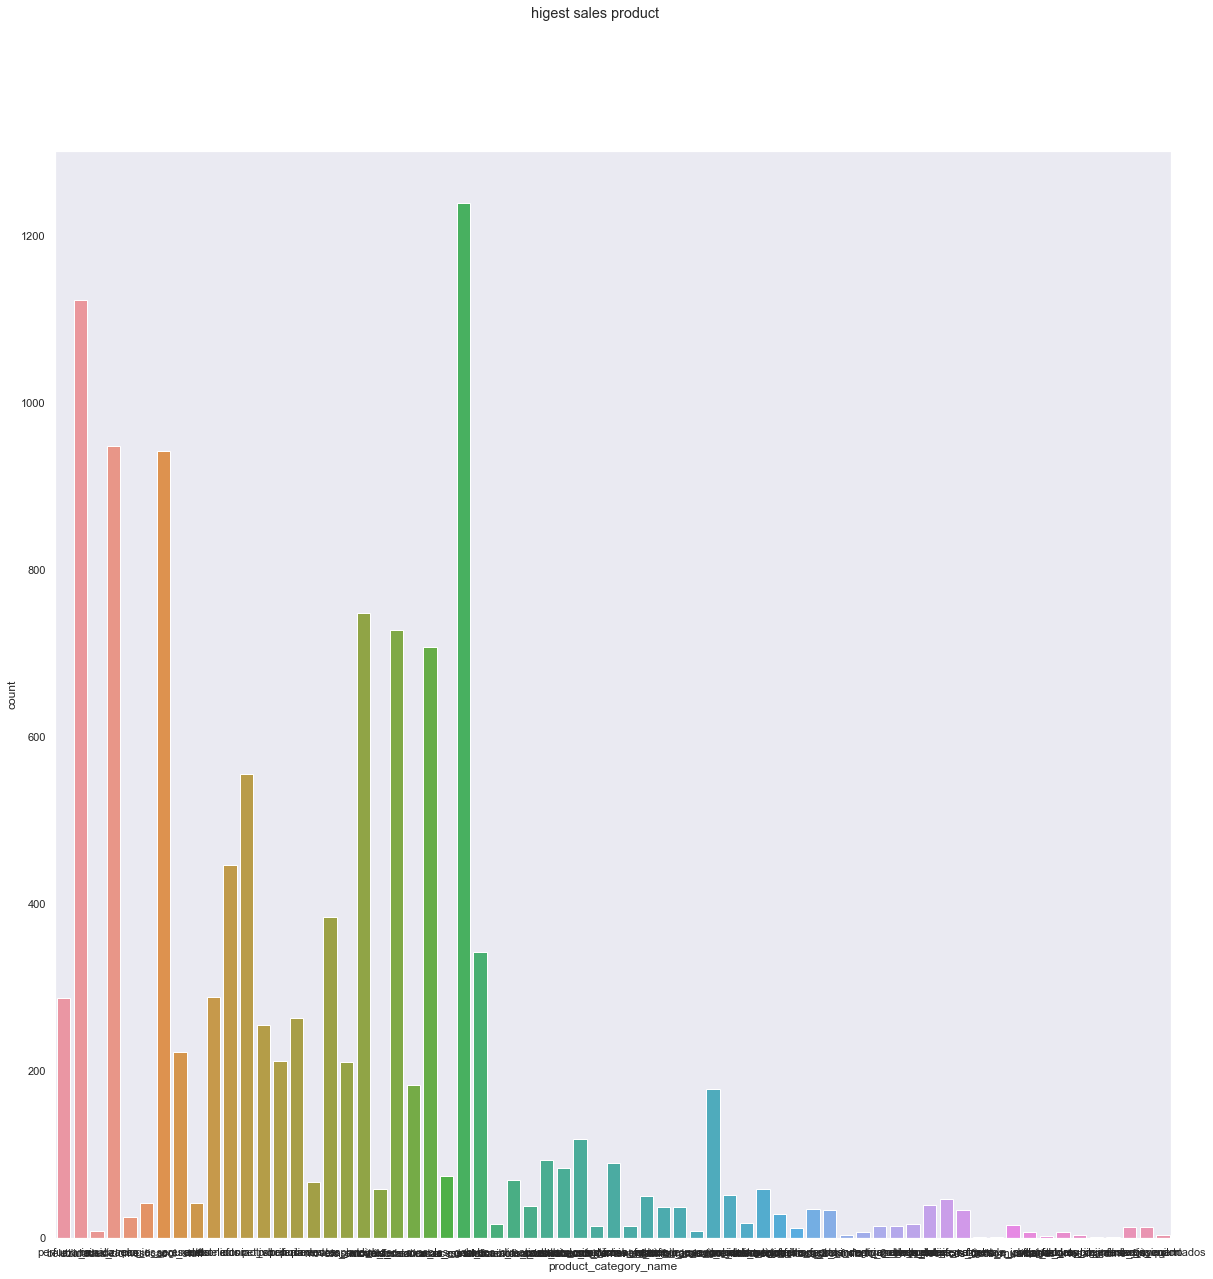

In [63]:
plt.figure(figsize=(20,20))
sns.set_theme(style ='dark')
sns.countplot(x ='product_category_name',data =df15 )
plt.suptitle('higest sales product')
plt.show()

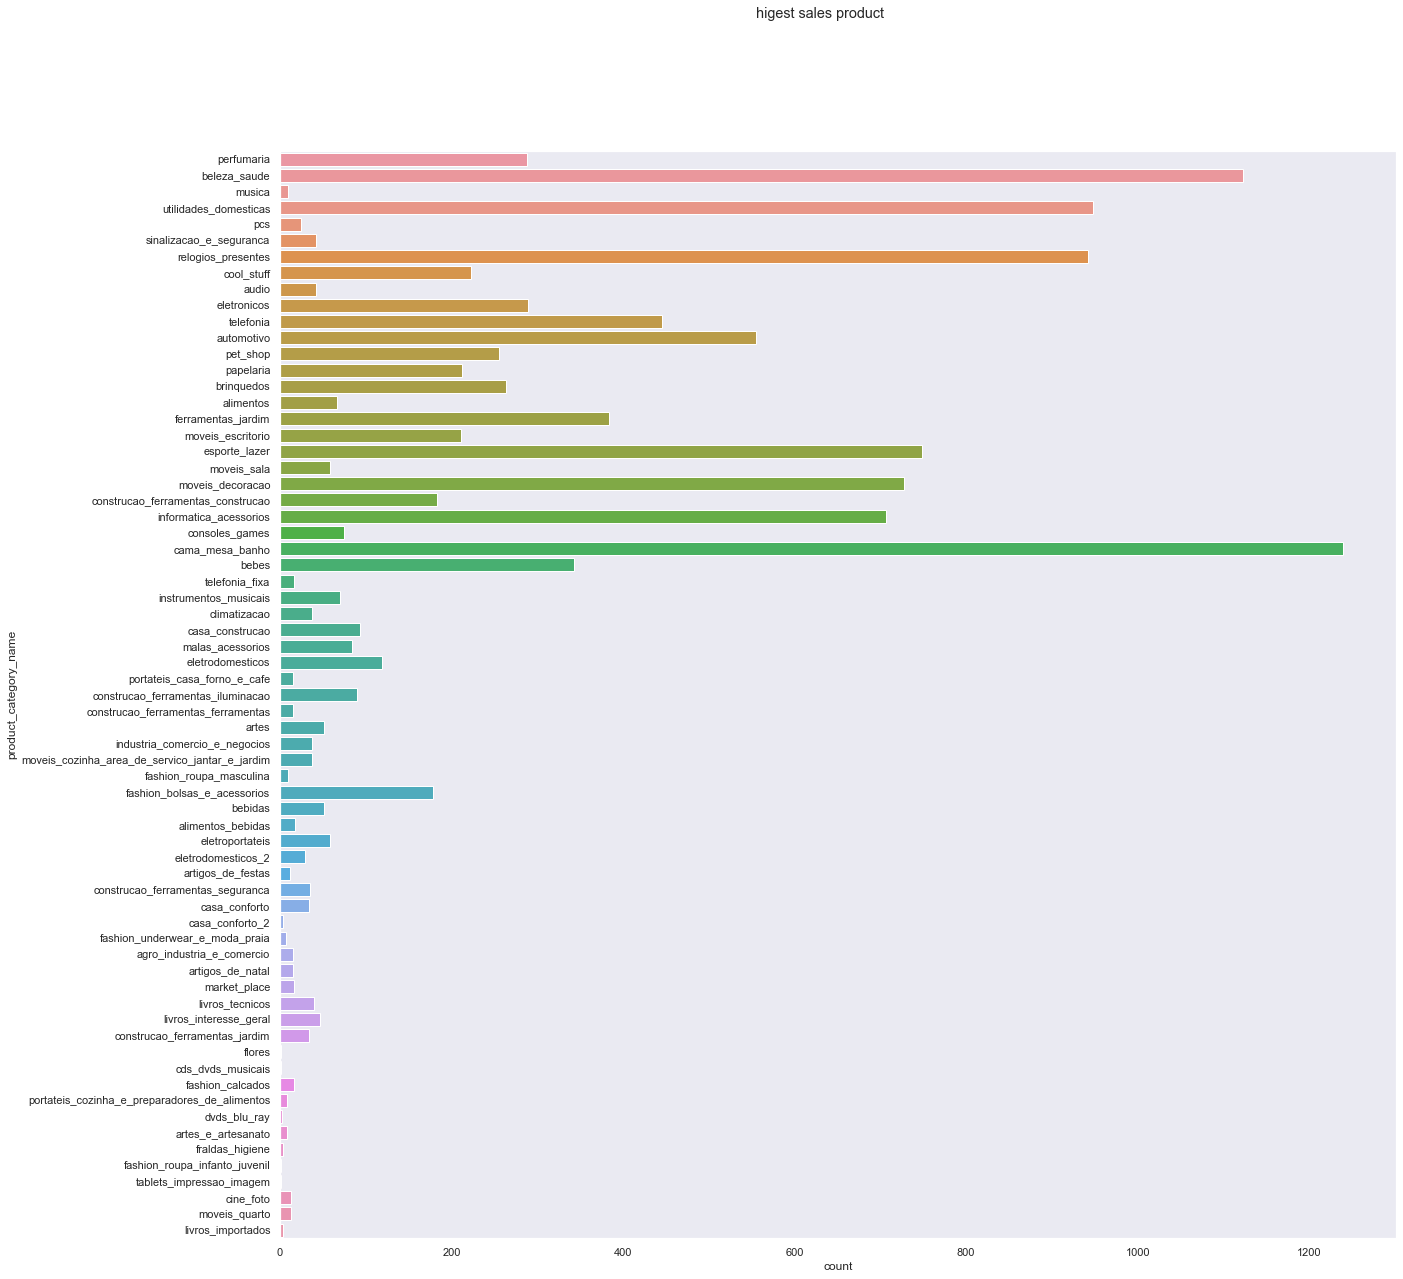

In [64]:
plt.figure(figsize=(20,20))
sns.set_theme(style = 'dark')
sns.countplot(y ='product_category_name',data =df15 )
plt.suptitle('higest sales product')
plt.show()

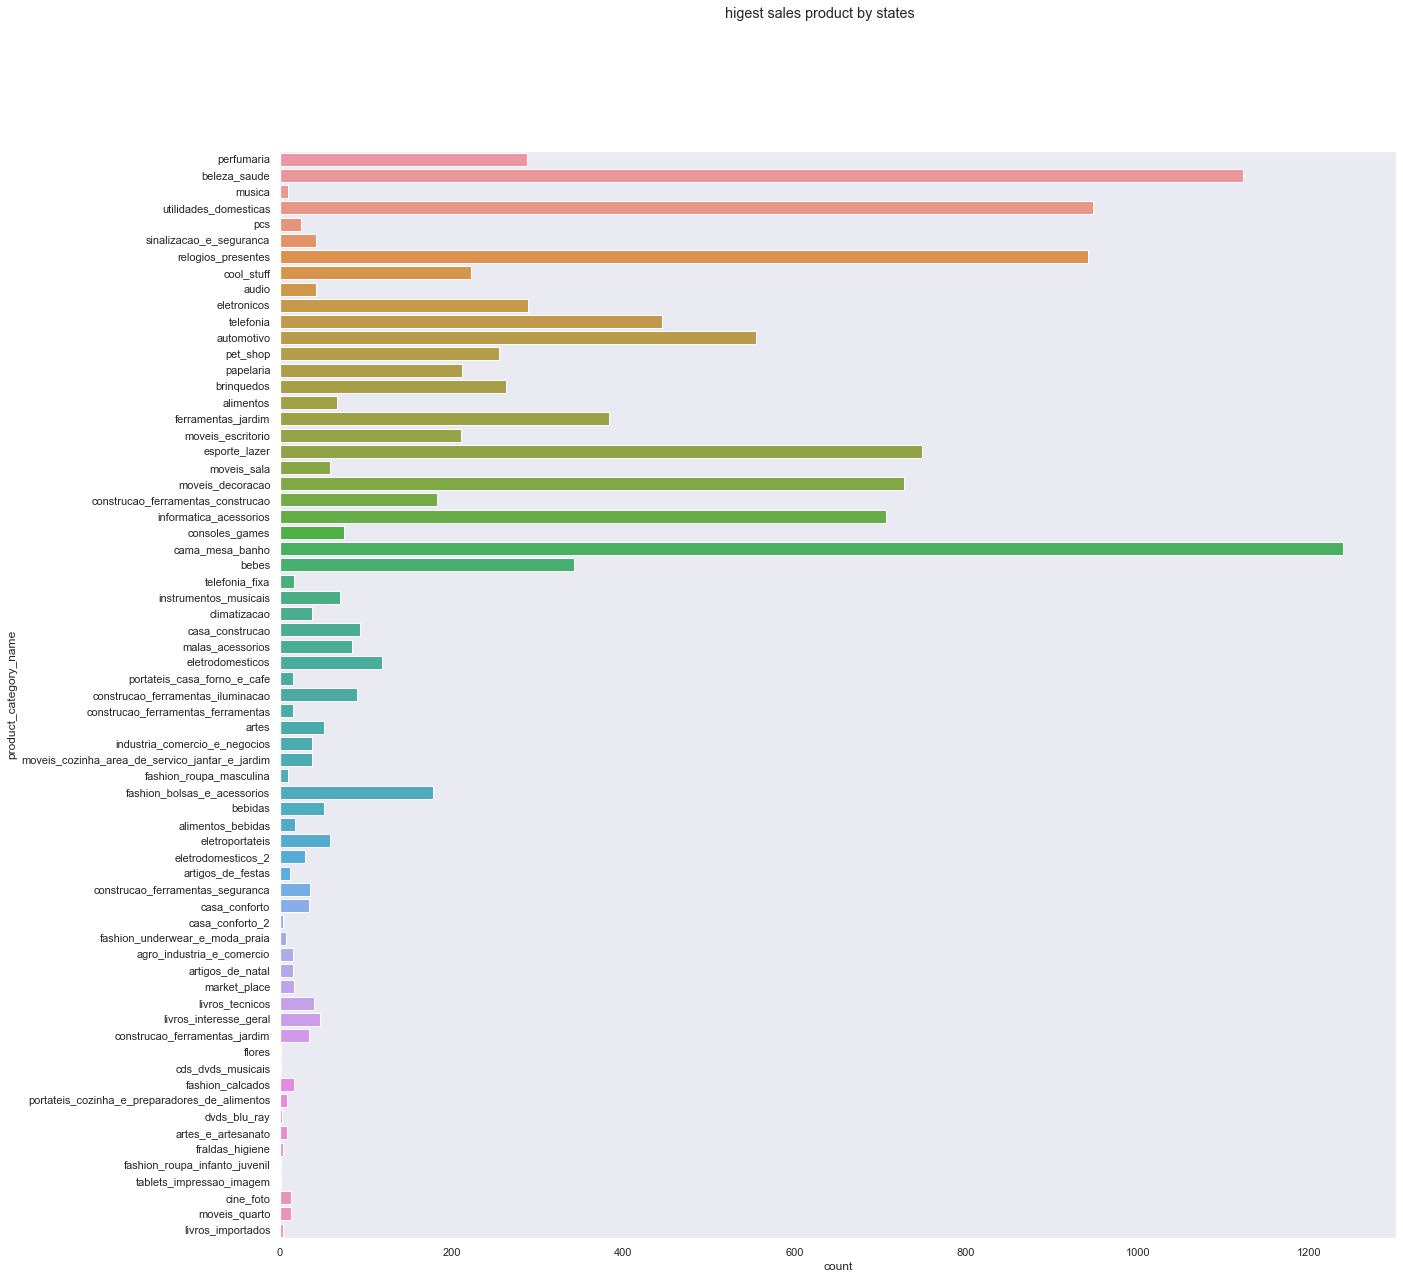

In [65]:
plt.figure(figsize=(20,20))
sns.set_theme(style = 'dark')
sns.countplot(y = 'product_category_name',data =df15 )
plt.suptitle('higest sales product by states')
plt.show()